# 02. Data Engineering

In this notebook, we will transform the data to fit the format required for our model and we will create new features to add valuable info to it. 

To start this notebook we will use the DataFrame we generated in Cleaning_Data.

## Loading libraries and data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import collections
import seaborn as sns
from functools import reduce
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [24]:
reves=pd.read_pickle("./data/cleaned_reves_df.pkl")

In [25]:
reves.head(2)

,belongs_to_collection,genres,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,cast_names,cast_gender,cast_order,Directors,Producers,Screenplayers
0,Toy Story Collection,"[Animation, Comedy, Family]",en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...",1995.0,10.0,0.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[John Lasseter],"[Bonnie Arnold, Ralph Guggenheim]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec..."
1,NaN,"[Adventure, Fantasy, Family]",en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[board game, disappearance, based on children'...",1995.0,12.0,4.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[Joe Johnston],"[Scott Kroopf, William Teitler]","[Jonathan Hensleigh, Greg Taylor, Jim Strain]"


## Let's perform some data transformation

#### Belongs to collection

As we explained in the first notebook, what we really need from this column is to know whether a movie belongs to a series or a collection or not. The name of the collection by itself woulnd't add any knowledge to our model. That's why we are going to overwrite this column with 2 possible values:
- 1 for movies that belong to a collection
- 0 for movies that don't

In [26]:
reves["belongs_to_collection"] = reves["belongs_to_collection"].apply(lambda x: 1 if type(x)==str else 0)

#### Genres

From "Genres" we are going to create the following columns that will add more valuable an actionable information to Reves:
- **Genres count:** We think that the number of genres associated to a movie could be related to the complexity of the plot, and eventually to the movie's potential revenue.
- **Dummy genres**: we will transform a list of N genres to N dummy columns that will contain 1 or 0 values according to whether the movie has that genre associated (1) or not (0).

In [27]:
def get_uniques(sequence):
    #from ast import literal_eval
    #sequence=sequence.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    counter=[]
    for line in sequence:
        counter.append(line)
        flat_list=[item for sublist in sequence for item in sublist]
        for sublist in sequence:
            for item in sublist:
                flat_list.append(item)
        counter=list(set(flat_list))
        
        return counter

In [28]:
genres=get_uniques(reves["genres"])
print(genres)

['Fantasy', 'Mystery', 'Documentary', 'Romance', 'Science Fiction', 'Horror', 'Western', 'Adventure', 'Comedy', 'History', 'TV Movie', 'Animation', 'Thriller', 'Family', 'Action', 'Foreign', 'Crime', 'Drama', 'Music', 'War']


In [29]:
def list_to_dummy(word,ref_column):
    word_list=[]
    for line in ref_column:
        value=0
        for element in line:
            if element==str(word):
                value+=1
            else:
                value+=0
        word_list.append(value)
    return word_list

In [30]:
for line in genres:
    reves[line]=list_to_dummy(line,reves["genres"])

In [31]:
reves.columns

Index(['belongs_to_collection', 'genres', 'original_language',
       'production_companies', 'revenue', 'runtime', 'title', 'keywords',
       'release_year', 'release_month', 'release_weekday', 'cast_names',
       'cast_gender', 'cast_order', 'Directors', 'Producers', 'Screenplayers',
       'Fantasy', 'Mystery', 'Documentary', 'Romance', 'Science Fiction',
       'Horror', 'Western', 'Adventure', 'Comedy', 'History', 'TV Movie',
       'Animation', 'Thriller', 'Family', 'Action', 'Foreign', 'Crime',
       'Drama', 'Music', 'War'],
      dtype='object')

Now we are creating a column with the number of genres per movie, as we think that it can be related to movie revenue as it can explain the complexity of the movie's synopsis. We will write a function because we will use it later for other purposes.

In [32]:
def lenght_column(column):
    column_lenght=[]
    for line in reves[column]:
        column_lenght.append(len(line))
    return column_lenght

In [33]:
reves["genres_count"]=lenght_column("genres")

In [34]:
reves.drop("genres",axis=1,inplace=True)

In [35]:
reves.head()

,belongs_to_collection,original_language,production_companies,revenue,runtime,title,keywords,release_year,release_month,release_weekday,...,Animation,Thriller,Family,Action,Foreign,Crime,Drama,Music,War,genres_count
0,1,en,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...",1995.0,10.0,0.0,...,1,0,1,0,0,0,0,0,0,3
1,0,en,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[board game, disappearance, based on children'...",1995.0,12.0,4.0,...,0,0,1,0,0,0,0,0,0,3
2,0,en,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[based on novel, interracial relationship, sin...",1995.0,12.0,4.0,...,0,0,0,0,0,0,1,0,0,3
3,1,en,"[Sandollar Productions, Touchstone Pictures]",76578911.0,106.0,Father of the Bride Part II,"[baby, midlife crisis, confidence, aging, daug...",1995.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,1
4,0,en,"[Regency Enterprises, Forward Pass, Warner Bros.]",187436818.0,170.0,Heat,"[robbery, detective, bank, obsession, chase, s...",1995.0,12.0,4.0,...,0,1,0,1,0,1,1,0,0,4


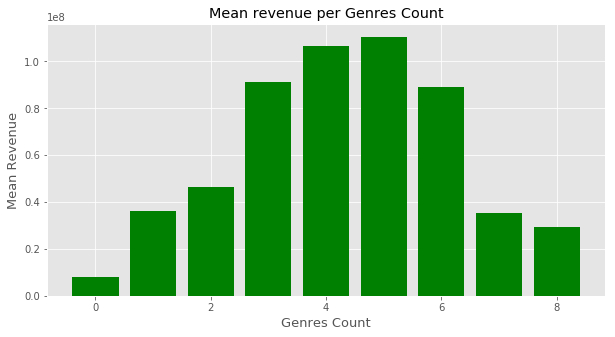

In [42]:
plt.subplots(figsize = (10, 5))
plt.bar(reves.groupby("genres_count")["genres_count"].count().index
         ,reves.groupby("genres_count")["revenue"].mean(),
       color="green",label="mean revenue")
plt.title("Mean revenue per Genres Count")
plt.ylabel("Mean Revenue", fontsize = 13)
plt.xlabel("Genres Count", fontsize = 13);

 
 
#### Original Language

As we stablished in the preliminar exploration, we will transform this feature into a categorical variable with 2 possible values:

- English = 1
- Not english = 0

In [43]:
reves["original_language"] = reves["original_language"].apply(lambda x: 1 if x=="en" else 0)

  
#### Production company

In [44]:
reves["production_companies_count"]=lenght_column("production_companies")

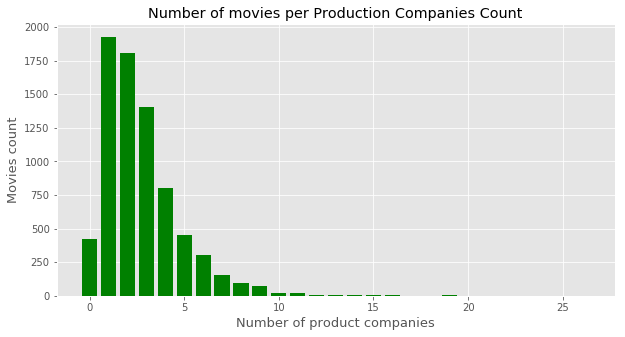

In [45]:
plt.figure(figsize = (10, 5))
plt.bar(reves.groupby("production_companies_count").count()["title"].index,
        reves.groupby("production_companies_count").count()["title"].values,color="green")
plt.ylabel("Movies count", fontsize = 13)
plt.xlabel("Number of product companies", fontsize = 13)
plt.title("Number of movies per Production Companies Count");
plt.show()

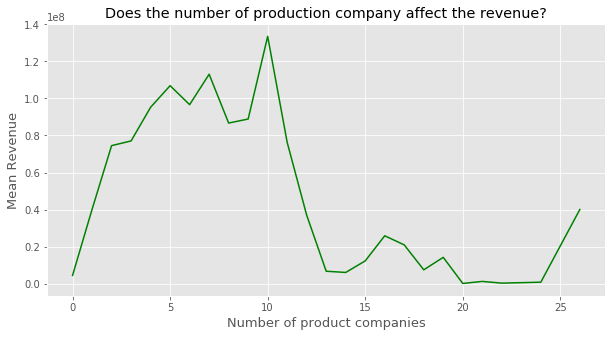

In [46]:
plt.figure(figsize = (10, 5))
plt.plot(reves.groupby("production_companies_count").mean()["revenue"], color="green")
plt.ylabel("Mean Revenue", fontsize = 13)
plt.xlabel("Number of product companies", fontsize = 13)
plt.title("Does the number of production company affect the revenue?");

In [18]:
## el numero de productoras tiene relación lineal con el revenue??? ¿A más productoras, más revenue?

In [19]:
## clusterización de productores. En función de most profitable. Para calcular el most profitable...

#mean revenue por combinacion de productoras?
#mean revenue por unique production company? ¿Asignamos el revenue del 

In [20]:
df=reves.filter(["production_companies","revenue"])
df.head(2)

,production_companies,revenue
0,[Pixar Animation Studios],373554033.0
1,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0


In [21]:
flat_list = ([item for sublist in df["production_companies"] for item in sublist])
flat_list

['Pixar Animation Studios',
 'TriStar Pictures',
 'Teitler Film',
 'Interscope Communications',
 'Twentieth Century Fox Film Corporation',
 'Sandollar Productions',
 'Touchstone Pictures',
 'Regency Enterprises',
 'Forward Pass',
 'Warner Bros.',
 'Universal Pictures',
 'Imperial Entertainment',
 'Signature Entertainment',
 'United Artists',
 'Eon Productions',
 'Columbia Pictures',
 'Castle Rock Entertainment',
 'Universal Pictures',
 'Amblin Entertainment',
 'Amblimation',
 'Hollywood Pictures',
 'Cinergi Pictures Entertainment',
 'Le Studio Canal+',
 'Laurence Mark Productions',
 'Metro-Goldwyn-Mayer (MGM)',
 'Carolco Pictures',
 'Universal Pictures',
 'Légende Entreprises',
 'Syalis DA',
 'De Fina-Cappa',
 'Columbia Pictures Corporation',
 'Mirage Enterprises',
 'Miramax Films',
 'A Band Apart',
 'O Entertainment',
 'Warner Bros.',
 'Morgan Creek Productions',
 'Columbia Pictures',
 'Jersey Films',
 'Metro-Goldwyn-Mayer (MGM)',
 'Silver Pictures',
 'Canal+',
 'Warner Bros.',
 'Dino

In [22]:
a=[]
for sublist in df["production_companies"]:
    for item in sublist:
        a.append([item,1])

In [23]:
a
#reduce

[['Pixar Animation Studios', 1],
 ['TriStar Pictures', 1],
 ['Teitler Film', 1],
 ['Interscope Communications', 1],
 ['Twentieth Century Fox Film Corporation', 1],
 ['Sandollar Productions', 1],
 ['Touchstone Pictures', 1],
 ['Regency Enterprises', 1],
 ['Forward Pass', 1],
 ['Warner Bros.', 1],
 ['Universal Pictures', 1],
 ['Imperial Entertainment', 1],
 ['Signature Entertainment', 1],
 ['United Artists', 1],
 ['Eon Productions', 1],
 ['Columbia Pictures', 1],
 ['Castle Rock Entertainment', 1],
 ['Universal Pictures', 1],
 ['Amblin Entertainment', 1],
 ['Amblimation', 1],
 ['Hollywood Pictures', 1],
 ['Cinergi Pictures Entertainment', 1],
 ['Le Studio Canal+', 1],
 ['Laurence Mark Productions', 1],
 ['Metro-Goldwyn-Mayer (MGM)', 1],
 ['Carolco Pictures', 1],
 ['Universal Pictures', 1],
 ['Légende Entreprises', 1],
 ['Syalis DA', 1],
 ['De Fina-Cappa', 1],
 ['Columbia Pictures Corporation', 1],
 ['Mirage Enterprises', 1],
 ['Miramax Films', 1],
 ['A Band Apart', 1],
 ['O Entertainment'

In [24]:
production_companies_ranking= ranking(reves, "production_companies","revenue")
production_companies_ranking

NameError: name 'ranking' is not defined

In [25]:
reves["production_companies"]

0                               [Pixar Animation Studios]
1       [TriStar Pictures, Teitler Film, Interscope Co...
2                [Twentieth Century Fox Film Corporation]
3            [Sandollar Productions, Touchstone Pictures]
4       [Regency Enterprises, Forward Pass, Warner Bros.]
5       [Universal Pictures, Imperial Entertainment, S...
6                       [United Artists, Eon Productions]
7          [Columbia Pictures, Castle Rock Entertainment]
8       [Universal Pictures, Amblin Entertainment, Amb...
9       [Hollywood Pictures, Cinergi Pictures Entertai...
10      [Le Studio Canal+, Laurence Mark Productions, ...
11      [Universal Pictures, Légende Entreprises, Syal...
12      [Columbia Pictures Corporation, Mirage Enterpr...
13                          [Miramax Films, A Band Apart]
14      [O Entertainment, Warner Bros., Morgan Creek P...
15                                    [Columbia Pictures]
16              [Jersey Films, Metro-Goldwyn-Mayer (MGM)]
17      [Silve


#### Cast

In [49]:
def word_count(dataframe, ref_variable):
    values_list = []
    
    for elements_list in dataframe[ref_variable]:
        for value in elements_list:
            values_list.append(value)
    
    return collections.Counter(values_list)

In [54]:
cast_names_counter = word_count(reves, "cast_names")

In [55]:
cast_names_counter

Counter({'Tom Hanks': 45,
         'Tim Allen': 14,
         'Don Rickles': 6,
         'Jim Varney': 5,
         'Wallace Shawn': 30,
         'John Ratzenberger': 28,
         'Annie Potts': 7,
         'John Morris': 4,
         'Erik von Detten': 4,
         'Laurie Metcalf': 18,
         'R. Lee Ermey': 20,
         'Sarah Freeman': 2,
         'Penn Jillette': 6,
         'Robin Williams': 50,
         'Jonathan Hyde': 7,
         'Kirsten Dunst': 32,
         'Bradley Pierce': 4,
         'Bonnie Hunt': 21,
         'Bebe Neuwirth': 11,
         'David Alan Grier': 20,
         'Patricia Clarkson': 28,
         'Adam Hann-Byrd': 3,
         'Laura Bell Bundy': 2,
         'James Handy': 8,
         'Gillian Barber': 2,
         'Brandon Obray': 1,
         'Cyrus Thiedeke': 1,
         'Gary Joseph Thorup': 1,
         'Leonard Zola': 1,
         'Lloyd Berry': 3,
         'Malcolm Stewart': 2,
         'Annabel Kershaw': 2,
         'Darryl Henriques': 6,
         'Robyn Drisco

In [56]:
print("There are %d unique cast_names" %(len(cast_names_counter.keys())))

There are 77477 unique cast_names


There are too many unique values to use in a model without overfitting, and also, too many values for a one hot encoding of this column. We need to simplify this information ir order to use it in Reves. 

There are many strategies we could follow: clustering actors by rating, clustering actors by mean revenue, replace "actor_name" with some actor's feature, such as genre, etc. We have searched for datasets that may contain a ranking of actors that we could use for clustering, but they do not have all the names that appear in our main dataset, and we do the merge, we have too many missing values. 

In a real version of Reves we think that a great strategy will be using a clustering by actor's mean earnings or popularity. That information is easy to get for a production company though it's not available for us at this point of Reves development. 

The question is: What is the best Reves could learn from the data that we currently have?

We think that is interesting to try 2 features:

- Number of characters/actors. Since it might have something to do with the plot's complexity.
- Main roles genres. Is the main lead a female or a male?


In [57]:
reves["number_of_characters"]=lenght_column("cast_names")

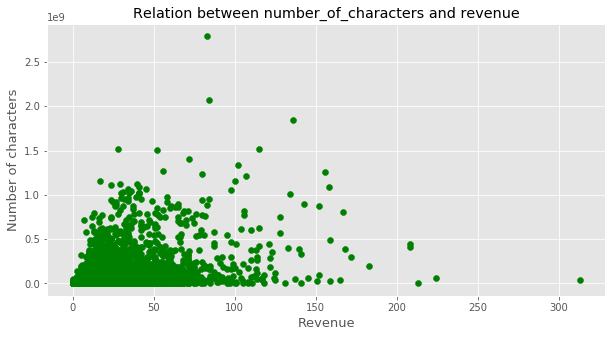

In [59]:
plt.figure(figsize = (10, 5))

fig = plt.scatter(x = reves["number_of_characters"], y = reves["revenue"],color="green")

plt.ylabel("Number of characters", fontsize = 13)
plt.xlabel("Revenue", fontsize = 13)
plt.title("Relation between number_of_characters and revenue")

plt.show()

In [34]:
reves.head(3)

,belongs_to_collection,budget,genres,original_language,production_companies,revenue,runtime,title,keywords,release_year,...,Documentary,Western,Adventure,Horror,War,TV Movie,Fantasy,Genres_count,production_companies_count,number_of_characters
0,1,30000000.0,"[Animation, Comedy, Family]",1,[Pixar Animation Studios],373554033.0,81.0,Toy Story,"[jealousy, toy, boy, friendship, friends, riva...",1995.0,...,0,0,0,0,0,0,0,3,1,13
1,0,65000000.0,"[Adventure, Fantasy, Family]",1,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,104.0,Jumanji,"[board game, disappearance, based on children'...",1995.0,...,0,0,1,0,0,0,1,3,3,26
2,0,16000000.0,"[Comedy, Drama, Romance]",1,[Twentieth Century Fox Film Corporation],81452156.0,127.0,Waiting to Exhale,"[based on novel, interracial relationship, sin...",1995.0,...,0,0,0,0,0,0,0,3,1,10


In [ ]:
#crear un subset sólo con title, revenue, cast_names_ cast_gender y cast_order. Para hacer el ranking en un dataframe aparte 
#y volver a asigar valores en un merge por "title"
    #CAST 1 NAME
    #CAST 1 GENRE
    #CAST 2 NAME
    #CAST 2 GENRE
    #CAST 3 NAME
    #CAST 3 GENRE
    #CAST 4 NAME
    #CAST 4 GENRE
#queremos asociar "Cast Name" con "cast gender" y "Cast Order"
#para cada movie,para cada actor, filtrar aquellas cuyo order sea mayor que 4

for movie in reves:
    

In [30]:
cast=reves[["cast_names","cast_gender","cast_order","revenue","title"]]

In [31]:
cast.shape

(7537, 5)

In [35]:
cast.head()

,cast_names,cast_gender,cast_order,revenue,title
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",373554033.0,Toy Story
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",262797249.0,Jumanji
2,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",81452156.0,Waiting to Exhale
3,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",76578911.0,Father of the Bride Part II
4,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",187436818.0,Heat


In [56]:
flat_cast_names=([item for sublist in cast["cast_names"] for item in sublist])
flat_cast_gender=([item for sublist in cast["cast_gender"] for item in sublist])
flat_cast_order=([item for sublist in cast["cast_order"] for item in sublist])

flat_cast=pd.DataFrame({"name":flat_cast_names,"gender":flat_cast_gender,"order":flat_cast_order})

In [57]:
flat_cast

,name,gender,order
0,Tom Hanks,2,0
1,Tim Allen,2,1
2,Don Rickles,2,2
3,Jim Varney,2,3
4,Wallace Shawn,2,4
5,John Ratzenberger,2,5
6,Annie Potts,1,6
7,John Morris,0,7
8,Erik von Detten,2,8
9,Laurie Metcalf,1,9


In [40]:
for row in cast:
    print (cast["revenue"],cast["title"])

0       373554033.0
1       262797249.0
2        81452156.0
3        76578911.0
4       187436818.0
5        64350171.0
6       352194034.0
7       107879496.0
8        11348324.0
9        13681765.0
10       10017322.0
11      116112375.0
12      135000000.0
13        4300000.0
14      212385533.0
15       35431113.0
16      115101622.0
17       30303072.0
18       49800000.0
19       27400000.0
20        1738611.0
21      180000000.0
22      168840000.0
23      254134910.0
24       39363635.0
25         676525.0
26      122195920.0
27       21284514.0
28       23574130.0
29      327311859.0
           ...     
7507    519876949.0
7508     17000000.0
7509      5730596.0
7510     56100000.0
7511      1015339.0
7512       393970.0
7513    604942143.0
7514       103504.0
7515     11666088.0
7516      8000000.0
7517      1957000.0
7518       126463.0
7519     10893246.0
7520      1805884.0
7521          422.0
7522      2411594.0
7523     71000000.0
7524     76000000.0
7525        14353.0


In [32]:
def combiner(dataframe):
    cast_name=[]
    cast_gender=[]
    cast_order=[]
    revenue=[]
    title=[]
    for element in dataframe:
        cast_name.append(cast["cast_name"])
        cast_gender.append(cast["cast_gender"])
        cast_order.append(cast["cast_order"])
        revenue.append(cast["revenue"])
        title.append(cast["title"])

    
    return (cast_name,cast_order,cast_gender,revenue,title)

tidy_cast=list(map(combiner,cast))
tidy_cast

KeyError: 'cast_name'

In [ ]:
general_cast=[]
for movie in cast:
    for element in movie:
        general_cast.append(["cast_names","cast_gender","cast_order","revenue","title"])

general_cast

#### Crew

In [ ]:
## numero de actores/personajes. Puede, al igual que numero de géneros, explicar una trama más complicada. 
## comparar con gráfica de géneros a ver si sacamos la misma conclusión sobre la complejidad de la trama

# de los 4 primeros actores, nombre y género. En tuplas?? 

#clusterizar actores. En función de most profitable. 

#Para clusterizar directores, keywords.... nos quedamos con min(), no mean().   
#Los elementos de estas listas no tienen por qué estar ordenados. 
#El primer director de la lista no tiene que ser el director más importante. 
#Nos quedamos con el mejor, o el que más relevancia en la lista de mostprofitable tenga

## Resumen de las transformaciones que se han realizado. 
Este es el código que usaremos en el backend para transformar los datos que nos de el usuario y poder meterlos al modelo. 
Hemos añadido una parte de limpieza de datos (lower, strip, etc) para limpiar los datos de entrada y que puedan entrar al modelo sin dar fallo. 